In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv'
bikes = pd.read_csv(url)

# Convert date column to datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Create a new target variable for total bike rentals
bikes['count'] = bikes['casual'] + bikes['registered']

# Select relevant features
features = ['temp_c', 'feels_like_c', 'hum', 'windspeed', 'hr',
            'weathersit', 'season', 'holiday', 'workingday']
target = 'count'

# Define features (X) and target (y)
X = bikes[features]
y = bikes[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 244.1471 - mean_absolute_error: 244.1471 - val_loss: 188.7186 - val_mean_absolute_error: 188.7186
Epoch 2/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 186.9956 - mean_absolute_error: 186.9956 - val_loss: 177.2478 - val_mean_absolute_error: 177.2478
Epoch 3/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 176.1982 - mean_absolute_error: 176.1982 - val_loss: 167.4483 - val_mean_absolute_error: 167.4483
Epoch 4/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 167.0503 - mean_absolute_error: 167.0503 - val_loss: 160.1464 - val_mean_absolute_error: 160.1464
Epoch 5/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 160.4577 - mean_absolute_error: 160.4577 - val_loss: 155.7474 - val_mean_absolute_error: 155.7474
Epoch 6/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 156.7384 - mean_absolute_error: 156.7384 - val_loss: 153.0926 - val_mean_absolute_error: 153.0926
Epoch 7/100
2812/2812 ━━━━━━━━━━

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test RMSE: 163.0113169480113
Test R2: 0.7739652395248413


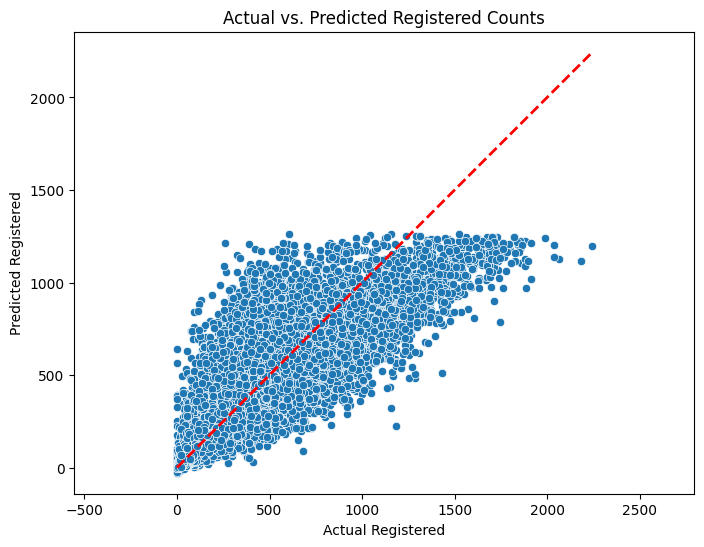

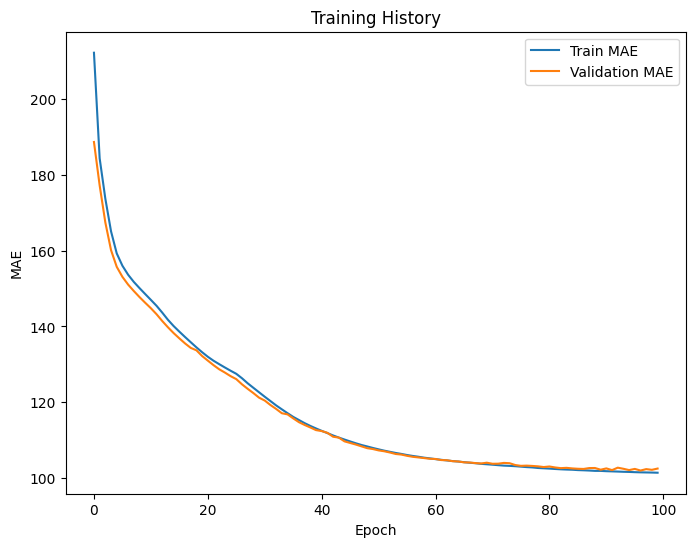

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test_scaled).flatten()

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("\nTest RMSE:", rmse)
print("Test R2:", r2)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Identity line
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs. Predicted Registered Counts')
plt.gca().set_aspect('equal', adjustable='datalim')  # Keep aspect ratio equal
plt.show()

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training History')
plt.show()



In [8]:
import pandas as pd
import numpy as np

# ----------------------------------------
# 1. Load the Holdout Test Dataset
# ----------------------------------------
holdout_url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv'
holdout_df = pd.read_csv(holdout_url)

print("First five rows of the holdout dataset:")
print(holdout_df.head())

print("\nColumns in the holdout dataset:")
print(holdout_df.columns)

# ----------------------------------------
# 2. Match Preprocessing with Training Data
# ----------------------------------------
# Drop 'dteday' if it exists (already converted in training data)
if 'dteday' in holdout_df.columns:
    holdout_df = holdout_df.drop(columns=['dteday'])

# Ensure holdout dataset has the same feature columns as training data
holdout_df = holdout_df.reindex(columns=X.columns, fill_value=0)

# Scale the holdout dataset using the fitted scaler from training data
X_holdout_scaled = scaler.transform(holdout_df)

# ----------------------------------------
# 4. Predict with the Trained Model
# ----------------------------------------
predictions = model.predict(X_holdout_scaled).flatten()  # Flatten ensures proper formatting

# ----------------------------------------
# 5. Save Predictions to CSV
# ----------------------------------------
# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=['predicted_registered'])

# Define CSV filename
csv_filename = "team8-module4-predictions.csv"

# Save to CSV file (ensure UTF-8 encoding for compatibility)
predictions_df.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"\nPredictions saved to {csv_filename}")


First five rows of the holdout dataset:
       dteday   hr  temp_c  feels_like_c     hum  windspeed  weathersit  \
0  11/15/2023  0.0     7.3           7.3  0.6667        0.0           1   
1  11/15/2023  1.0     6.2           6.2  0.7406        0.0           1   
2  11/15/2023  2.0     5.2           3.2  0.8232        8.5           1   
3  11/15/2023  3.0     5.7           3.6  0.7573        9.4           2   
4  11/15/2023  4.0     5.2           2.9  0.7918       10.1           2   

   season  holiday  workingday  
0       4        0           1  
1       4        0           1  
2       4        0           1  
3       4        0           1  
4       4        0           1  

Columns in the holdout dataset:
Index(['dteday', 'hr', 'temp_c', 'feels_like_c', 'hum', 'windspeed',
       'weathersit', 'season', 'holiday', 'workingday'],
      dtype='object')
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Predictions saved to team8-module4-predictions.csv
